In [145]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


In [174]:
a = np.array([[1,2],[4,3],[5,6]])
# a = np.random.randn(1000,2)
print(a)
k = np.argmin(a,axis=1)
print(k.shape)

[[1 2]
 [4 3]
 [5 6]]
(3,)


In [175]:
k

array([0, 1, 0])

In [176]:
def l2_distance(x_i, centroid):
    distance = 0
    for j in range(len(x_i)):
        distance += (x_i[j]-centroid[j])**2
    return np.sqrt(distance)

In [177]:
def kmeans(x, NUM_K, iterations):
#     Initialize the cluster
    initial_centroids = x[np.random.choice(len(x),NUM_K,replace=False)]
#     initial_centroids = np.array([[-0.7732, -1.6495],[-0.4184, -1.0047]])
    initial_cen = initial_centroids 
    for it in range(iterations):
        if (it ==0):
            centroids = initial_centroids
        distances = np.zeros((len(x), NUM_K))
        for i in range(len(x)):
            x_i = x[i]
            for k in range(NUM_K):
                distances[i,k] += l2_distance(x_i, centroids[k])
        Labeled_idx = np.argmin(distances,1)
        
        new_centroids = []
        for k in range(NUM_K):
            k_idx = np.where(Labeled_idx==k)
#             print(k_idx)
            new_centroid = np.mean(x[k_idx],axis=0)
            new_centroids.append(new_centroid ) 
#             print(new_centroid.shape)
#         print(new_centroids)
        if (it+1==iterations):
            new_centroids = np.array(new_centroids)
            new_distances = np.zeros((len(x), NUM_K))
            for i in range(len(x)):
                x_i = x[i]
                for k in range(NUM_K):
                    new_distances[i,k] += l2_distance(x_i, new_centroids[k])
            New_Labeled_idx = np.argmin(new_distances,1)
        centroids = new_centroids
    return initial_cen, New_Labeled_idx

In [178]:
# data = np.loadtxt('Data/elliptical.txt')
# data = np.loadtxt('Data/square.txt')
data = np.loadtxt('Data/cho.txt')
# data = np.loadtxt('Data/iyer.txt')
print(len(data))
flag_line = data[:,1]
# print(flag_line)
neg1_list = []
for i in range(len(flag_line)):
    if (data[i,1] == -1):
        neg1_list.append(i)
data = np.delete(data, neg1_list, axis=0)
print(len(data))
# print(data[:,1])
    

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA
pca = PCA(n_components=2).fit(scaled_data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

data2D = pca.transform(scaled_data)

# plt.scatter(data2D[:, 0], data2D[:, 1],
#             c= truth, edgecolor='')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()
initial_centroids, labels = kmeans(data2D, 5, 40)
# labels = kmeans(data, 2, 20)

# print(labels)

386
386
[0.40760319 0.19620284]
[53.21679196 36.92177282]


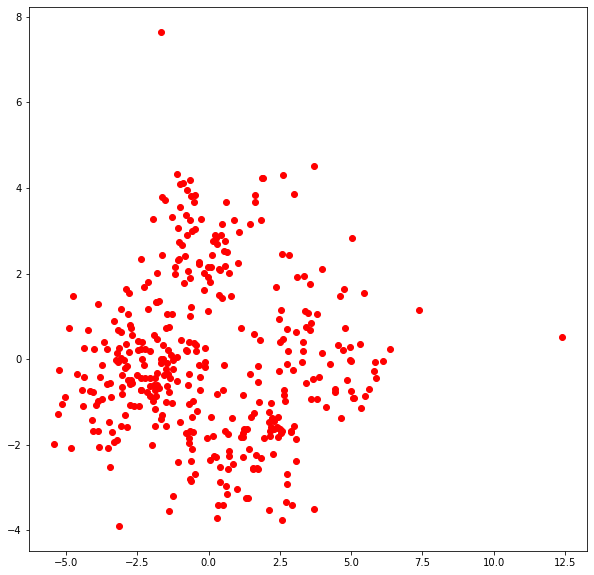

In [179]:
colors = ['r']
idx ={}
for k in range(5):
    idx[str(k)]=[]
for i, k in enumerate(labels):
    idx[str(k)].append(i)
    
plt.figure(figsize=(10,10))    
for k in range(5):
    plt.scatter(data2D[idx[str(k)],0], data2D[idx[str(k)],1],marker='o',color=colors)

plt.show()

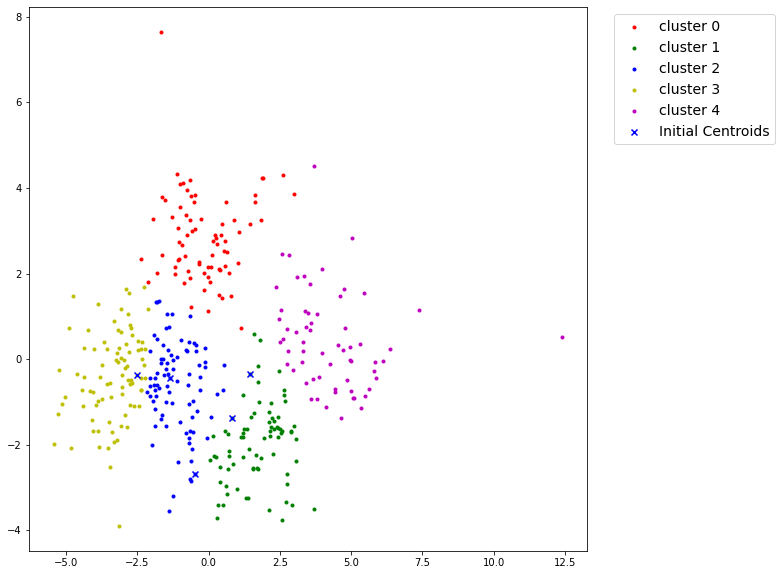

In [180]:
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'w', 'k', 'slateblue', 'slategray']

idx ={}
for k in range(5):
    idx[str(k)]=[]
for i, k in enumerate(labels):
    idx[str(k)].append(i)
    
plt.figure(figsize=(10,10))    
for k in range(5):
    plt.scatter(data2D[idx[str(k)],0], data2D[idx[str(k)],1],marker='.',color=colors[k],label='cluster %d'%(k))
    
plt.scatter(initial_centroids[:,0],initial_centroids[:,1],marker='x',color='b',label='Initial Centroids')
plt.legend(loc='upper right', bbox_to_anchor=(1.35,1),fontsize=14)

plt.show()

In [181]:
# k-means on cho dataset
truth = data[:,1]
k_labels = labels  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

# For each cluster label...
for k in np.unique(k_labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((k_labels==k)*(truth==t)) for t in np.unique(truth)]
    k_labels_matched[k_labels==k] = np.unique(truth)[np.argmax(match_nums)]

# print(truth)
# print(np.unique(k_labels))
# print(np.unique(truth))
# print(k_labels)
# print(k_labels_matched)

accuracy_score(k_labels_matched, truth)


0.7072538860103627